# Basic Image Classification 

#### Goal: To develop a robust and accurate model for the recognition of handwritten numerical figures. Through meticulous fine-tuning and optimization of deep learning algorithms within the TensorFlow framework, the aim is to achieve high precision and recall rates in classifying handwritten digits. 

### Import TensorFlow

In [1]:
import tensorflow as tf

# Set TensorFlow logging level to ERROR
import logging; tf.get_logger().setLevel(logging.ERROR)

# Print TensorFlow version
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.1.0


# The Dataset
### Import MNIST

In [2]:
# Importing the MNIST Dataset
from tensorflow.keras.datasets import mnist

# Loading the Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Shapes of Imported Arrays

In [3]:
print ('x_train shape: ', x_train.shape)
print ('y_train shape: ', y_train.shape)
print ('x_test shape: ', x_test.shape)
print ('y_test shape: ', y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


### Plotting an Image Example

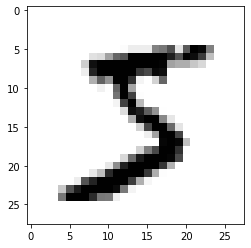

In [4]:
# Importing Matplotlib for Plotting
from matplotlib import pyplot as plt
%matplotlib inline

#Displaying the first image
plt.imshow(x_train[0], cmap = 'binary')
plt.show()

### Display Labels

In [5]:
#Displaying the first label
y_train[0]

5

In [6]:
#Displaying the sets of labels in Y_train and y_test
print(set(y_train))
print(set(y_test))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# One Hot Encoding

In [7]:
# Importing to_categorical function from keras.utils module
from tensorflow.keras.utils import to_categorical

# Encoding Training and Test Labels
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

### Validated Shapes

In [8]:
#Displayin the shape of the encoded training and test labels
print ('y_train_encoded shape: ', y_train_encoded.shape)
print ('y_test_encoded shape: ', y_test_encoded.shape)

y_train_encoded shape:  (60000, 10)
y_test_encoded shape:  (10000, 10)


### Displaying Encoded Labels

In [9]:
#Displaying the encoded version of some training labels

print ('value of 8: ', y_train[8])
print('Encoded value of 8: ', y_train_encoded[8])
print ('value of 5: ', y_train[5])
print('Encoded value of 5: ', y_train_encoded[5])
print ('value of 0: ', y_train[0])
print('Encoded value of 0: ', y_train_encoded[0])
print ('value of 23: ', y_train[23])
print('Encoded value of 23: ', y_train_encoded[23])

value of 8:  1
Encoded value of 8:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
value of 5:  2
Encoded value of 5:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
value of 0:  5
Encoded value of 0:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
value of 23:  1
Encoded value of 23:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


# Neural Networks

# Preprocessing the Examples

### Unrolling N-dimensional Arrays to Vectors

In [10]:
# Importing the numpy module and aliasing it as np
import numpy as np

# Reshaping the training and test images
x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

# Printing the shapes of the reshaped training and test images
print ('x_train_reshaped shape: ', x_train_reshaped.shape)
print ('x_test_reshaped shape: ', x_test_reshaped.shape)

x_train_reshaped shape:  (60000, 784)
x_test_reshaped shape:  (10000, 784)


### Display Pixel Values

In [11]:
# Printing the unique values in the first reshaped training image
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


In [12]:
print (set(x_train_reshaped[1]))

{0, 6, 7, 10, 12, 19, 21, 25, 28, 29, 37, 38, 47, 48, 50, 51, 54, 56, 57, 60, 63, 71, 75, 76, 79, 84, 85, 86, 96, 112, 114, 121, 122, 128, 130, 131, 135, 141, 145, 146, 148, 159, 162, 163, 165, 167, 168, 173, 178, 179, 186, 189, 190, 195, 196, 198, 199, 202, 208, 215, 223, 224, 225, 227, 228, 229, 230, 233, 237, 238, 239, 240, 243, 246, 249, 252, 253, 255}


In [13]:
print (set(x_train_reshaped[59999]))

{0, 2, 4, 6, 7, 10, 11, 14, 18, 19, 21, 22, 23, 25, 26, 27, 28, 38, 40, 41, 44, 46, 48, 52, 59, 60, 62, 63, 66, 67, 71, 73, 76, 77, 86, 89, 90, 92, 94, 97, 101, 105, 110, 116, 121, 122, 126, 130, 131, 134, 142, 146, 147, 153, 154, 162, 164, 165, 167, 172, 175, 176, 177, 180, 181, 187, 190, 192, 193, 196, 197, 198, 199, 203, 209, 212, 213, 216, 217, 218, 219, 222, 225, 229, 230, 231, 232, 233, 236, 237, 238, 239, 240, 242, 243, 244, 248, 249, 252, 253, 254, 255}


### Data Normalization

In [14]:
# Calculating mean and standard deviation of the reshaped training images
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

# A small constant to prevent division by zero
epsilon = 1e-10

# Normalizing the training and test images
x_train_norm = (x_train_reshaped - x_mean)/(x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean)/(x_std + epsilon)

### Display Normalized Pixel Values

In [15]:
# Printing the unique values in the first normalized training image
print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

# Creating a Model


In [16]:
# Importing the Sequential model and Dense layer from TensorFlow's Keras API
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Defining a Sequential model
model = Sequential([
    # Adding a fully connected (Dense) layer with 128 units and ReLU activation function.
    # The input shape is specified as (784,) which corresponds to a flattened input image of size 784 (28x28 pixels).
    Dense(128, activation = 'relu', input_shape = (784, )), 
   
     # Adding another fully connected (Dense) layer with 128 units and ReLU activation function.
    Dense(128, activation = 'relu'), #relu is a linear function for all the positive values. Set all -ve values to 0.
    
    # Adding the output layer with 10 units (corresponding to the number of classes in the dataset) 
    # and softmax activation function.
    # Softmax activation function is used for multi-class classification problems 
    # to output probability distribution over the classes.
    Dense(10, activation = 'softmax')
                                    
    
])

In [17]:
# Compiling the model
model.compile(
    optimizer='sgd', 
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

# Printing a summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Training the Model

In [18]:
model.fit(x_train_norm, # Input training data (normalized)
          y_train_encoded, # Target training data (one-hot encoded)
          epochs = 3 # Number of epochs (iterations over the entire dataset) for training
         )

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 23s 375us/sample - loss: 0.3653 - accuracy: 0.8916
Epoch 2/3
60000/60000 [==============================] - 7s 111us/sample - loss: 0.1808 - accuracy: 0.9477
Epoch 3/3
60000/60000 [==============================] - 6s 106us/sample - loss: 0.1365 - accuracy: 0.9602


### Evaluating the Model

In [19]:
# Evaluating the model on the test set
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)
print ('Test set accuracy: ', accuracy * 100)

10000/10000 [==============================] - 1s 86us/sample - loss: 0.1291 - accuracy: 0.9607
Test set accuracy:  96.069997549057


# Predictions

### Predictions on Test Set

In [20]:
# Making predictions using the trained model on the test set
preds = model.predict(x_test_norm)

print ('Shape of preds: ', preds.shape)

Shape of preds:  (10000, 10)


### Plotting the Results

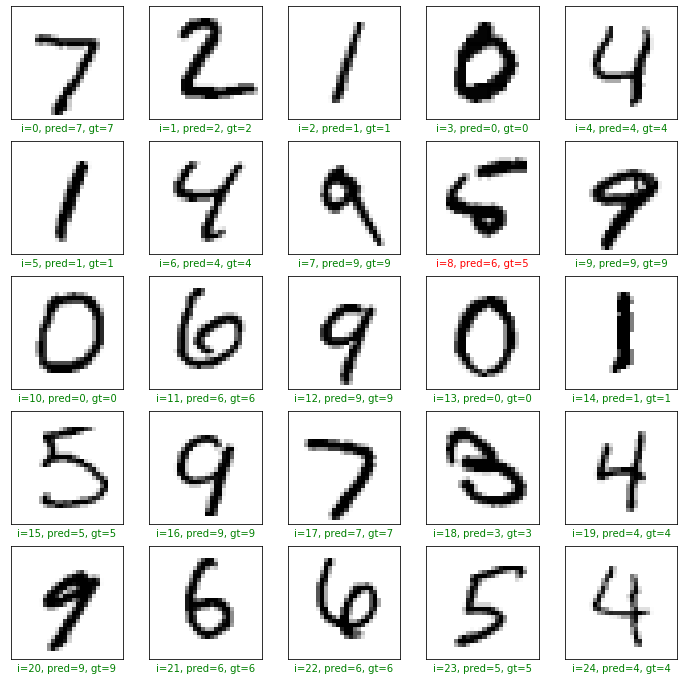

In [21]:
plt.figure(figsize = (12, 12))

start_index = 0

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    # Get the predicted label using argmax on the predictions array
    pred = np.argmax(preds[start_index + i])
    # Get the ground truth label from the original test labels
    gt = y_test[start_index+i]
    
    # Set the color of the label based on whether the prediction matches the ground truth
    col = 'g'  # Green color for correct predictions
    if pred != gt:
        col = 'r'  # Red color for incorrect predictions
        
    # Set the label of the image with prediction and ground truth information
    plt.xlabel('i={}, pred={}, gt={}'.format(start_index + i, pred, gt), color = col)
    # Display the image using binary colormap (black and white)
    plt.imshow(x_test[start_index + i], cmap = 'binary')

plt.show()

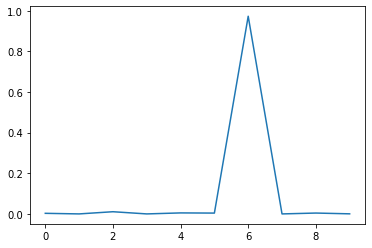

In [22]:
# Plotting the prediction probabilities for the 9th sample in the test set
plt.plot(preds[8])
plt.show()

### With a 96% accuracy the model successfully classifies each handwritten digit with the correct label.